# ASTR 596: FDS - The Midterm

### Dun, dun dun. 
#### (suspenseful music here)

## Start with the Cepheid data you have already seen in lecture 03 and 04.

## There are measurements of several Cepheid variable stars in each of 9 nearby galaxies.

## Begin by reading this code and familiarizing yourself with what attributes and functions are available to you. In particular, it will help to read comments at the top of the data file.

In [1]:
exec(open('cepheids.py').read())
ceph = Cepheids('../../data/03/R11ceph.dat')
hosts = ceph.list_hosts()

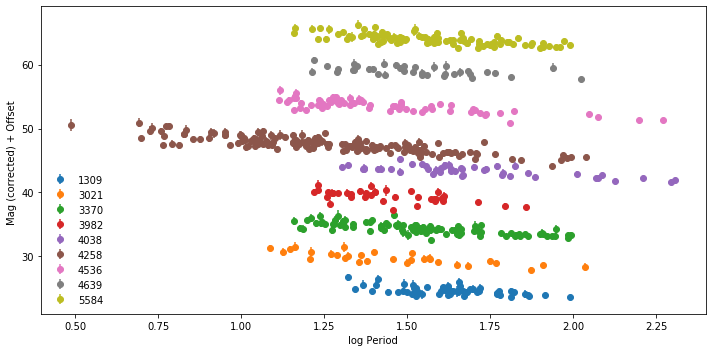

In [2]:
### %matplotlib inline
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

for i, ID in enumerate(hosts):
    ceph.select(ID)
    mobs = ceph.mobs
    logP = ceph.logP
    sigma_obs = ceph.sigma
    ax.errorbar(logP, mobs+(5*i), yerr=sigma_obs, linestyle='None', marker='o', label=ID)
    
ax.legend(frameon=False)
ax.set_xlabel('log Period')
ax.set_ylabel('Mag (corrected) + Offset ')
fig.tight_layout()

# Q1.

## This data was taken from [Riess et al., 2011](https://arxiv.org/abs/1103.2976)

## The global model for the magnitudes of these Cepheids is given in Equation 1. You may ignore the effect of metalicity

## Some parameters (such as distance modulus) are specific to each galaxy.

## Others are common to all galaxies. 

## Assuming Gaussian magnitude errors and no period (and you may ignore metallicity entirely), but that Cepheids scatter off the period-luminosity relation because of some Gaussian intrinsic dispersion $\sigma_{\text{int}}$, write down your expression for the likelihood being careful to use the same indices that Riess et. al used.


#### Given what we discussed in class, we can write down the $\ln L$

$ \ln L(a, b) = constant - \frac{1}{2 \sigma^2} \sum_{i=1}^N (y_i - M(x_i))^2 $

#### Riess et al. 2011

global model = $m_{W{_i,_j}}$ = ($\mu_{0,i} - \mu_{0, 4258}$) + $zp{_W,_{4258}}$ + $b_{W}log (P_{i,j})$

#### For this case:

$ \ln L(zp{_W,_{4258}},b_{W}) = constant - \frac{1}{2 \sigma^2} \sum_{i=1}^N (m - model(\mu_{0,i},\mu_{0, 4258},zp{_W,_{4258}},b_{W},log (P_{i,j})))^2 $ 

$ -\ln L(b_{W},zp{_W,_{4258}}) = \frac{1}{2 \sigma_{int}^2} \sum_{i,j} (m_{obs}  - model(\mu_{0,i},\mu_{0, 4258},zp{_W,_{4258}},b_{W},log (P_{i,j})))^2 $

$ -\ln L(b_{W},zp{_W,_{4258}}) = \frac{1}{2 \sigma_{int}^2} \sum_{i,j} (m_{obs}  - (b_{W}log (P_{i,j}) + zp{_W,_{4258}} + (\mu_{0,i} - \mu_{0, 4258}) )))^2 $

# Q2. 

## Given what you know for each of the parameters in this model, write down physically motivated (i.e. not just top hats on everything) priors, along with your explanation.

## Think particularly about the priors for distances to each galaxy.

There are two priors I'm considering in my linear model; one for the slope and one for the y-intercept. 

For the slope, which corresponds to $b_{w}$ in my final expression from Question 1, we can see from the data plotted above that the value of the slope will be negative, given the downward trend of the data. Since the downward trend is subtle, I'm constraining my value for the prior to be between -10 and 0.

***

The y-intercept in this case is $zp{_W,_{4258}} + (\mu_{0,i} - \mu_{0, 4258})$ from my expression above. Since $zp{_W,_{4258}}$ is the intercept of the P–L relation, which for this case can't be negative, and $(\mu_{0,i} - \mu_{0, 4258})$ is the reddening-free distances for the hosts galaxies relative to NGC 4258, and distances can't be negative, we know that the prior should be positive. Looking at the data plotted above once more, I think that the prior should be between 25 and 35. 

# Q3. 

## Implement this likelihood and prior in python and sample the posterior distribution with emcee.

## Construct traceplots for each parameter, as well as corner plots for each pair of parameters.


## If your Markov Chains are reasonable, verify that your model fits are reasonable by reconstructing Fig. 7 of Riess et al. 2011

## Compare the intercept you find for the intercepts $\mu_{0,i} - \mu_{0, 4258}$ vs Table 3 of Riess et al. 2011

In [492]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
from scipy.optimize import minimize as minimize

In [493]:
#STEP 1: What's the model?
def model(logP, bw, b):
    # y = mx + b 
    m = bw
    x = logP
    y = m*x + b
    return y

######################################
######################################

#STEP 2: What's the Likelihood?
def chisquared_func(free_params, logP, m_obs, sigma_mag):
    b_w, yint = free_params
    inner = m_obs - model(logP, b_w, yint)
    chisquared = np.sum((inner/sigma_mag)**2)
    return chisquared
    
def log_likelihood_func(free_params,  logP, m_obs, sigma_mag):   
    likelihood = 0.5 * chisquared_func(free_params, logP, m_obs, sigma_mag)
    return -likelihood

######################################
######################################

#STEP 3: What's the Prior?
def log_prior(free_params):
    b_w, b = free_params
    if -10.0 < b_w < 0.0 and 25.0 < b < 35.0:
        return 0.0
    return -np.inf

def log_probability(free_params, logP, m_obs, sigma_mag):
    lp = log_prior(free_params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_func(free_params,  logP, m_obs, sigma_mag)

100%|██████████| 5000/5000 [00:05<00:00, 838.58it/s]


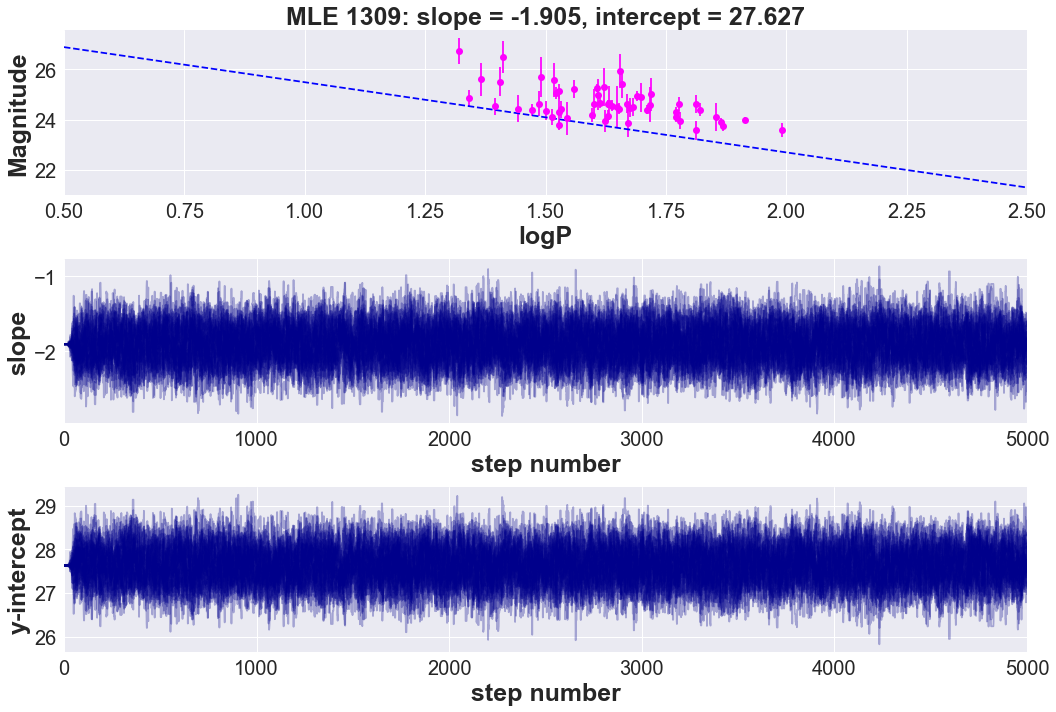

100%|██████████| 5000/5000 [00:05<00:00, 902.12it/s]


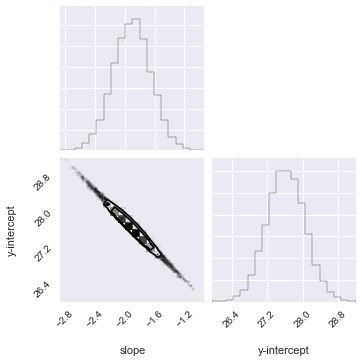

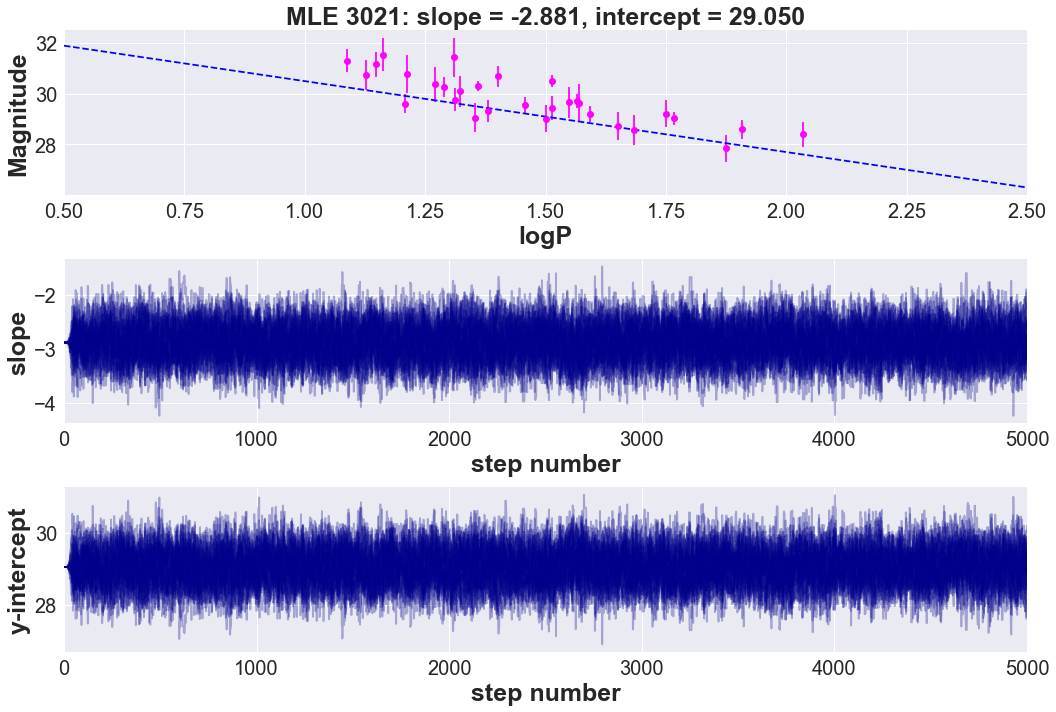

100%|██████████| 5000/5000 [00:05<00:00, 976.98it/s]


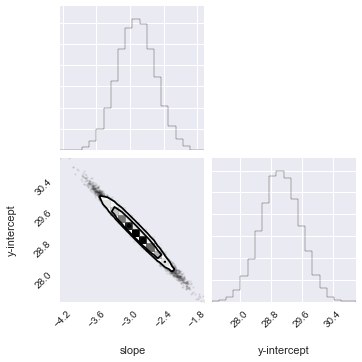

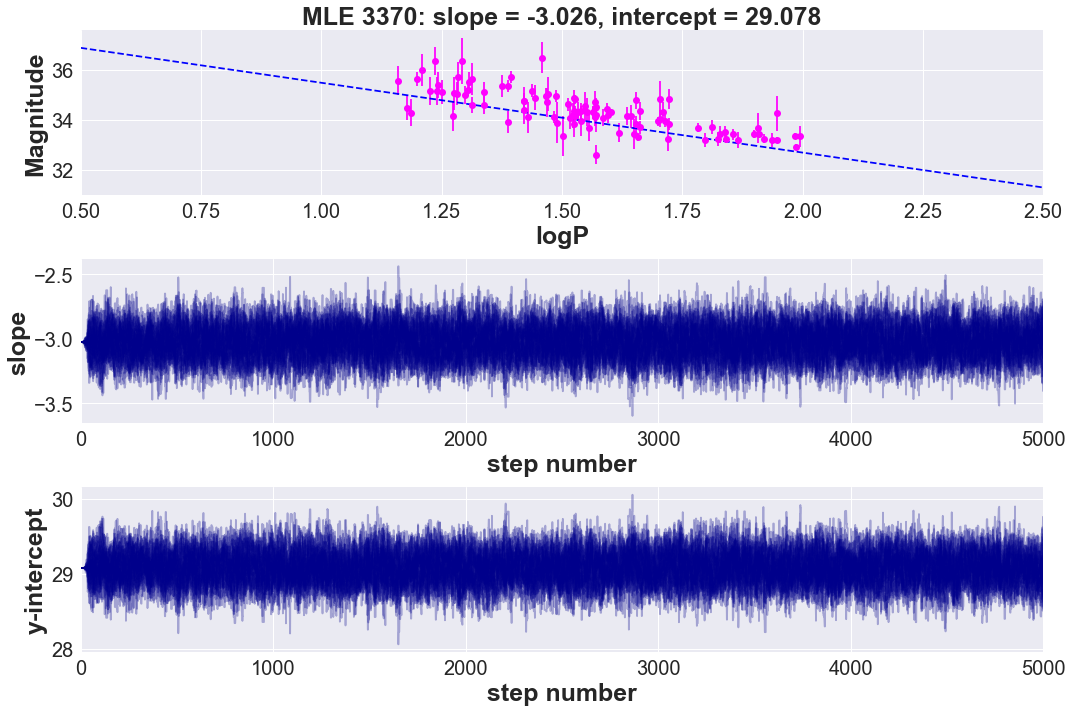

100%|██████████| 5000/5000 [00:05<00:00, 983.16it/s] 


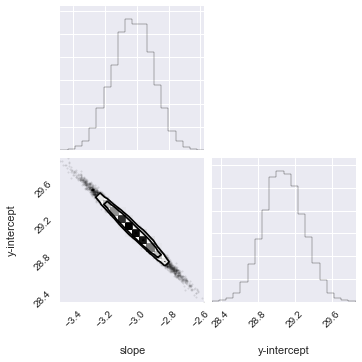

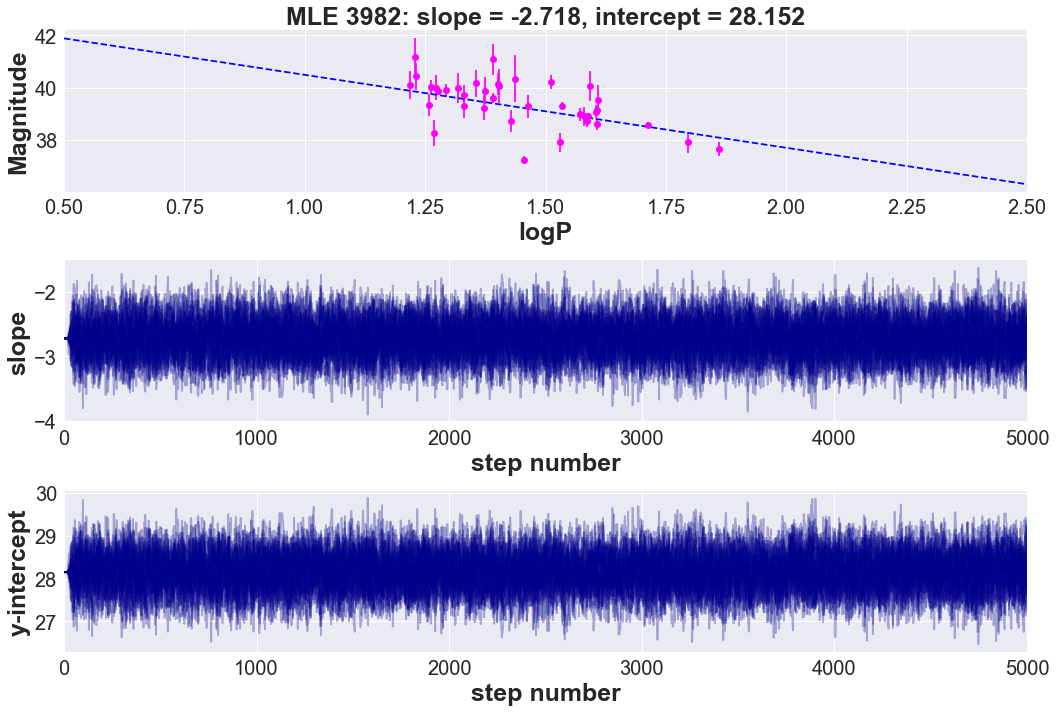

100%|██████████| 5000/5000 [00:05<00:00, 990.55it/s] 


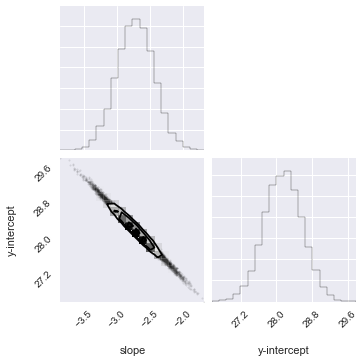

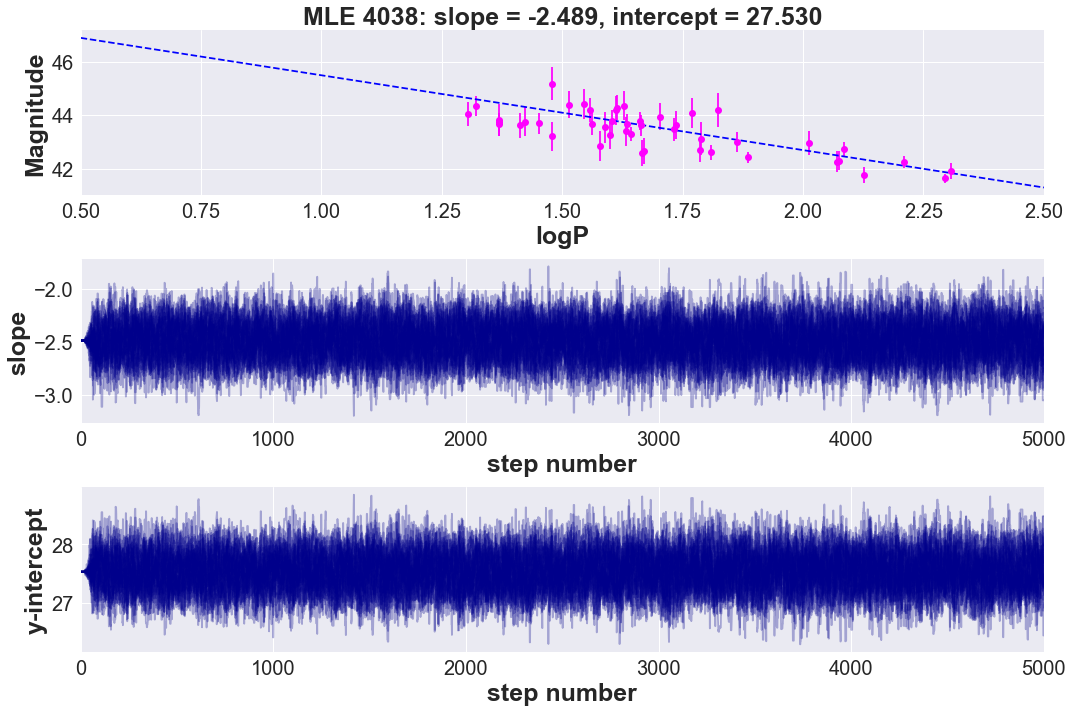

100%|██████████| 5000/5000 [00:05<00:00, 945.63it/s]


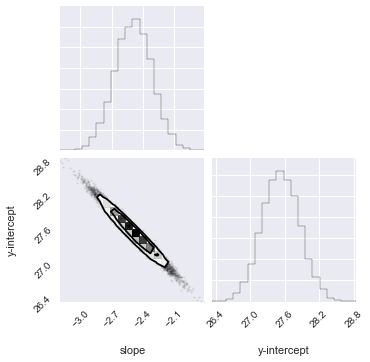

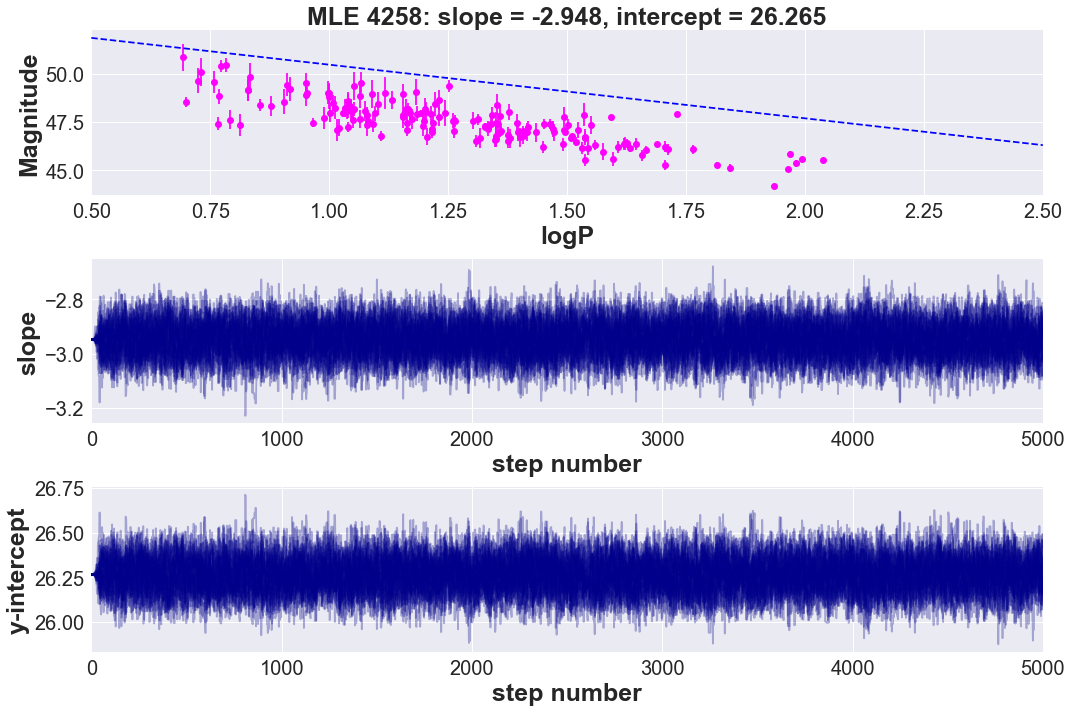

100%|██████████| 5000/5000 [00:05<00:00, 983.26it/s]


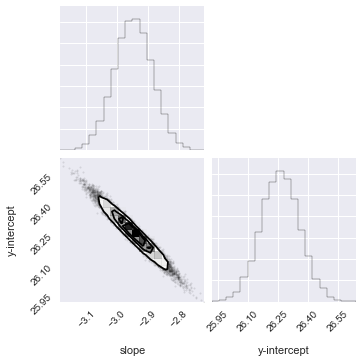

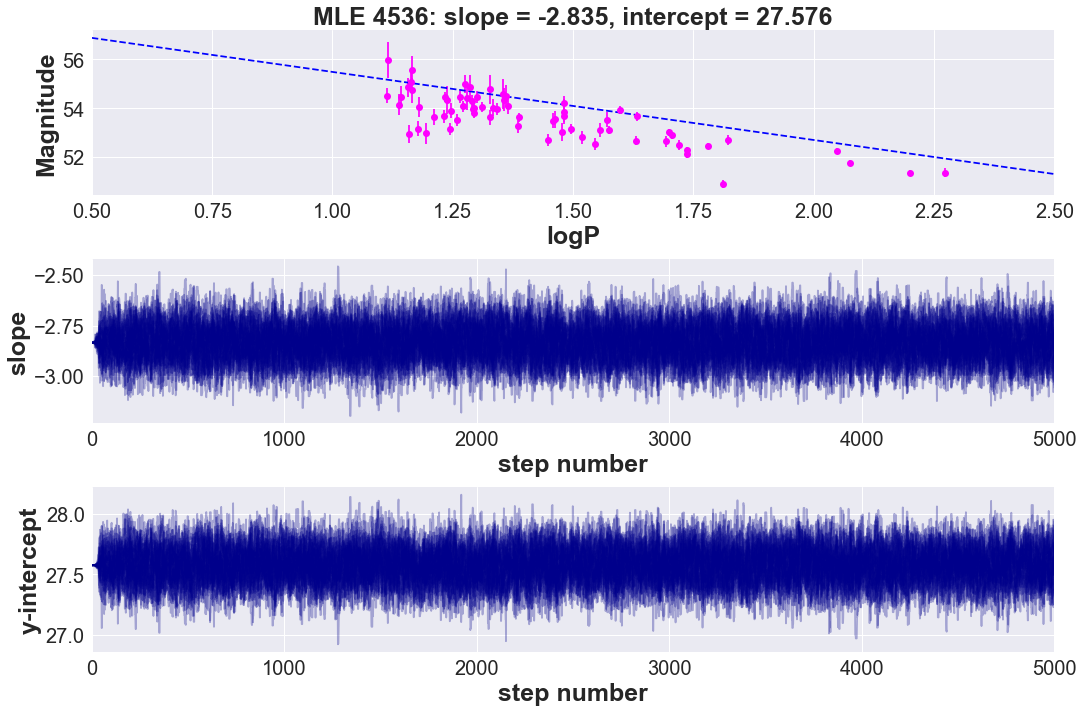

100%|██████████| 5000/5000 [00:05<00:00, 967.87it/s]


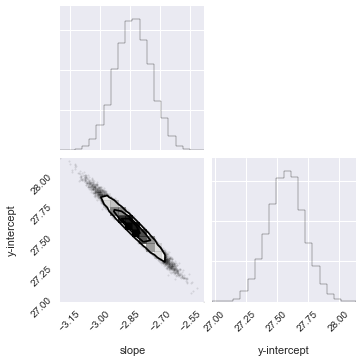

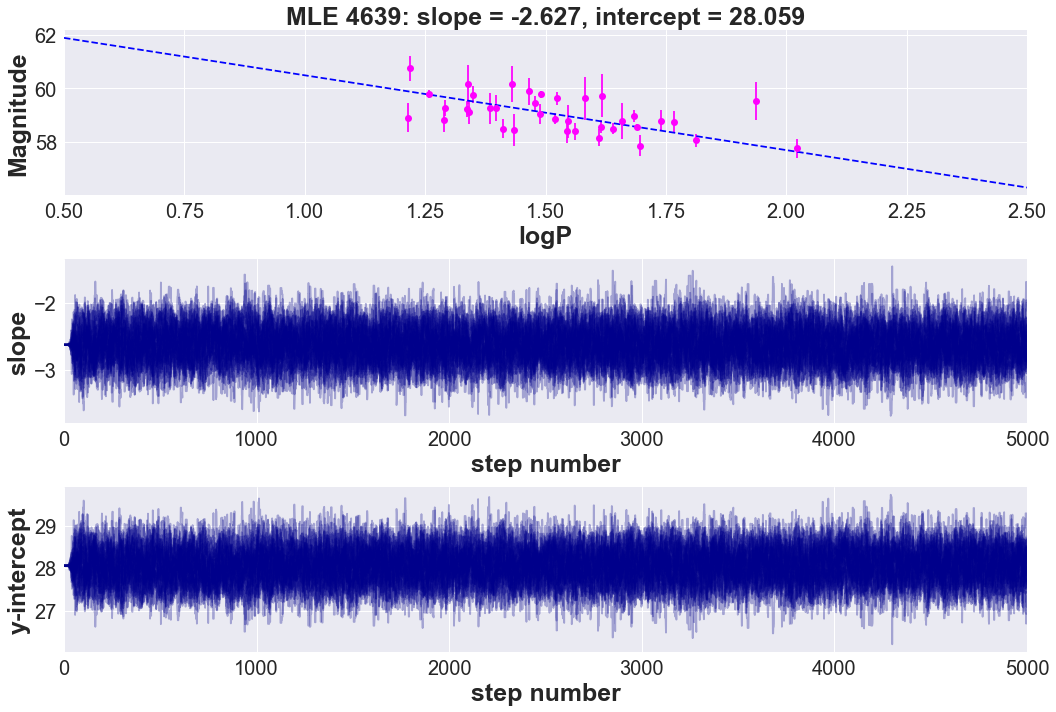

100%|██████████| 5000/5000 [00:05<00:00, 979.69it/s]


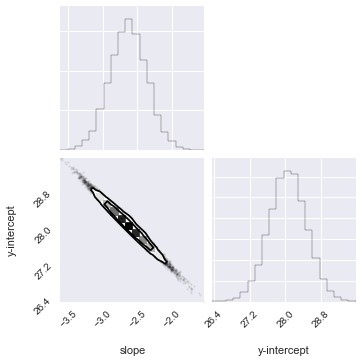

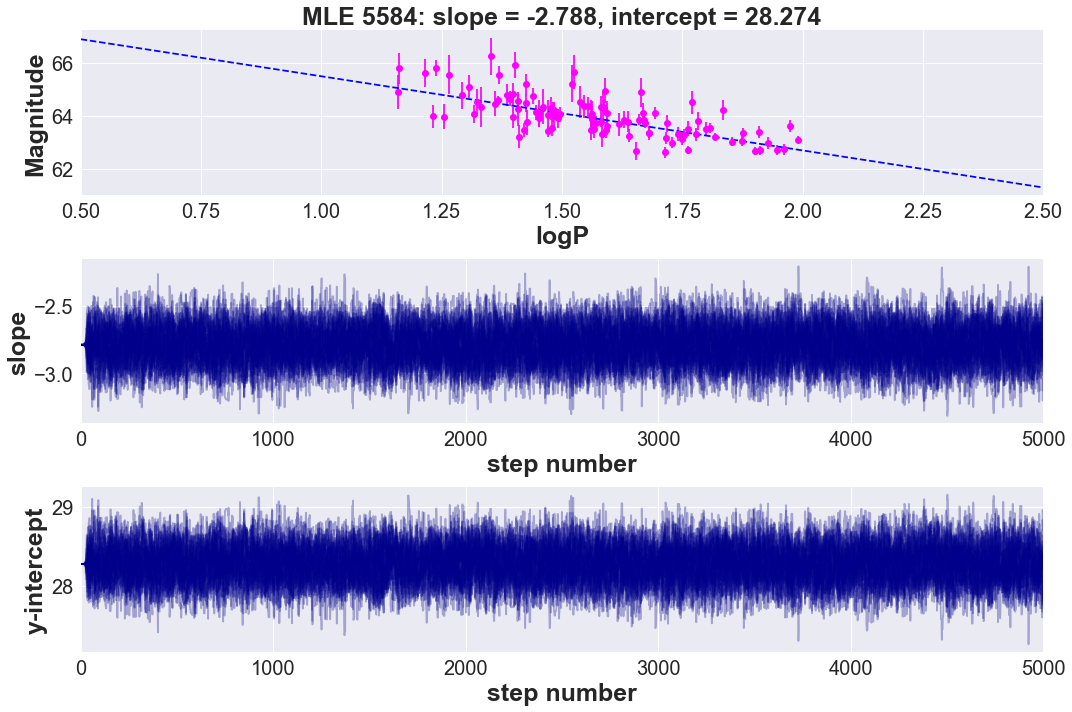

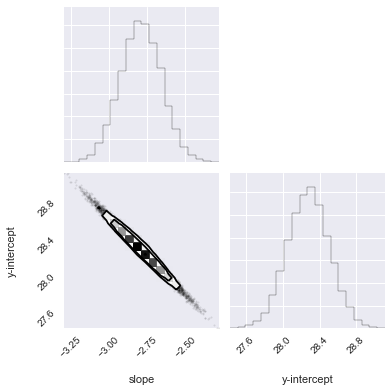

In [495]:
plot_logP = np.linspace(0.5, 2.5, num = 100)
for i, ID in enumerate(hosts):    
    ceph.select(ID)
    mobs = ceph.mobs
    logP = ceph.logP
    sigma_obs = ceph.sigma
    
    guesses = np.array([-5, 30.]) 
    solution = minimize(chisquared_func, guesses, args=(logP, mobs, sigma_obs))
    slope_ml, yintercept_ml = solution.x
    
    
    ######################################
    ######################################
    
    
    #STEP 4: How do you sample?
    pos = solution.x + (1e-5 * np.random.randn(32, 2))
    nwalkers, ndim = pos.shape

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(logP, mobs, sigma_obs))
    sampler.run_mcmc(pos, 5000, progress=True)
    samples = sampler.get_chain()
    
    
    fig, ((ax1), (ax2), (ax3)) = plt.subplots(3,1, figsize=(15, 10))
    ax1.set_title("MLE %s: slope = %.3f, intercept = %.3f" % (ID, slope_ml, yintercept_ml), weight = "bold", size = 25)
    ax1.errorbar(logP, mobs+(5*i), yerr=sigma_obs, linestyle='None', color = "magenta", marker='o', label=ID)
    ax1.plot(plot_logP, (5*i)+model(plot_logP, bw_ml, b_ml),linestyle='--',color='blue')
    ax1.set_xlabel("logP", weight = "bold", size = 25)
    ax1.set_ylabel("Magnitude", weight = "bold", size = 25)
    ax1.set_xlim(0.5,2.5)
    ax1.tick_params("both", labelsize = 20)

    
    ax2.plot(samples[:, :, 0], color = "darkblue", alpha=0.3)
    ax2.set_xlim(0, len(samples))
    ax2.set_ylabel("slope", weight = "bold", size = 25)
    ax2.set_xlabel("step number", weight = "bold", size = 25)
    ax2.tick_params("both", labelsize = 20)
    
    
    ax3.plot(samples[:, :, 1], color = "darkblue", alpha=0.3)
    ax3.set_xlim(0, len(samples))
    ax3.set_xlabel("step number", weight = "bold", size = 25)
    ax3.set_ylabel("y-intercept", weight = "bold", size = 25)
    ax3.tick_params("both", labelsize = 20)
    
    plt.tight_layout()
    plt.show()
    
    flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
    fig = corner.corner(flat_samples, labels = ["slope", "y-intercept"]) 

fig.tight_layout()



# Q4.

## Riess et al. do a *simultaneous* fit to the Cepheids and SNe data (Table 3 of their paper). 

## I'm slightly less cruel, so you can take your intercepts $\mu_{0,i} - \mu_{0, 4258}$ and the re-express equation 4 using a substitution of equation 3.

## Write that expression down.

#### Equation 3 and Equation 4: 

$m^{0}_{v,i} = (\mu_{0,i} - \mu_{0,4258}) +m^{0}_{v,4258}$ (3)

$ \log{H_0} =\frac{(m^{0}_{v,4258} - \mu_{v,4258}) + 5a_v+ 25}{5} $  (4)


#### Rearraning and substituting in Equation 3:

$m^{0}_{v,4258} - \mu_{0,4258}  = m^{0}_{v,i} - \mu_{0,i} $

$  \log{H_0} =\frac{m^{0}_{v,i} - \mu_{v,i} + 5a_v+ 25}{5}\
=\frac{m^{0}_{v,i} - \mu_{v,i} + \mu_{v,4258}  -  \mu_{v,4258}  + 5a_v+ 25}{5} \
 =\frac{(m^{0}_{v,i} + 5a_v) - (\mu_{v,i} - \mu_{v,4258})  -  \mu_{v,4258}  + 25}{5} $


$ {H_0} =10^{\frac{(m^{0}_{v,i} + 5a_v) - (\mu_{v,i} - \mu_{v,4258})  -  \mu_{v,4258}  + 25}{5}  } $

# Q5

## Using the supernova data in Table 3 (enter it into whatever data structure you deem best) and the distance modulus to NGC 4258 from [Humphreys et al., 2013 ](https://ui.adsabs.harvard.edu/abs/2013ApJ...775...13H/abstract) and using the simple sample statistics you learned in Week 1, estimate the Hubble constant.

In [436]:
table3 = pd.read_csv("Reiss_Table3.csv")
table3

,Host,SN Ia,Filters,"m^0_v,i + 5a_v",sigma^a,"mu_0,i - mu_0,4258",mu_0 Best
0,n4536,SN 1981B,UBVR,15.147,0.145,1.567,30.91 (0.07)
1,n4639,SN 1990N,UBVRI,16.040,0.111,2.383,31.67 (0.08)
2,n3370,SN 1994ae,UBVRI,16.545,0.101,2.835,32.13 (0.07)
3,n3982,SN 1998aq,UBVRI,15.953,0.091,2.475,31.70 (0.08)
4,n3021,SN 1995al,UBVRI,16.699,0.113,3.138,32.27 (0.08)
5,n1309,SN 2002fk,BVRI,16.768,0.103,3.276,32.59 (0.09)
6,n5584,SN 2007af,BVRI,16.274,0.122,2.461,31.72 (0.07)
7,n4038,SN 2007sr,BVRI,15.901,0.137,2.396,31.66 (0.08)


In [487]:
humphrey_dist_4258 = 7.6e6 # 7.60 ±0.17 Mpc
distance_modulus = 5*np.log10(humphrey_dist_4258/10)
print("Distance Modulus:",distance_modulus)

Distance Modulus: 29.404067961403957


In [488]:
logH0 = ((table3["m^0_v,i + 5a_v"]) - (table3["mu_0,i - mu_0,4258"]) - distance_modulus + 25) / 5
H0 = 10**logH0
print("logH0:",logH0.values, "\n")
print("My H0 value is %.3f ± %.3f km/s/Mpc" % (H0.mean(),H0.std()))

logH0: [1.83518641 1.85058641 1.86118641 1.81478641 1.83138641 1.81758641
 1.88178641 1.82018641] 

My H0 value is 69.129 ± 3.835 km/s/Mpc
